# Analyse de l'incidence de la varicelle

## Chargement des données

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [3]:
data_file = "varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [4]:
raw_data = pd.read_csv(data_file, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202344          7   4336     1854    6818       7           3   
1     202343          7   3924     1629    6219       6           3   
2     202342          7   3968     1212    6724       6           2   
3     202341          7   3356     1764    4948       5           3   
4     202340          7   2845     1410    4280       4           2   
5     202339          7   1739      629    2849       3           1   
6     202338          7   1663      274    3052       3           1   
7     202337          7   1122      223    2021       2           1   
8     202336          7    726       10    1442       1           0   
9     202335          7    961       96    1826       1           0   
10    202334          7   1168        9    2327       2           0   
11    202333          7   3308     1184    5432       5           2   
12    202332          7   7996     1120   14872      12           2   
13    202331          7   3318     1398    5238       5           2   
14    202330          7   5821     3269    8373       9           5   
15    202329          7  13558     8297   18819      20          12   
16    202328          7   6700     4043    9357      10           6   
17    202327          7   7253     4599    9907      11           7   
18    202326          7   9192     6223   12161      14          10   
19    202325          7  11498     8257   14739      17          12   
20    202324          7  11115     7968   14262      17          12   
21    202323          7  12563     6134   18992      19           9   
22    202322          7  12184     8125   16243      18          12   
23    202321          7  11349     7598   15100      17          11   
24    202320          7   9000     4615   13385      14           7   
25    202319          7   9344     6091   12597      14           9   
26    202318          7  10671     7291   14051      16          11   
27    202317          7   9184     6162   12206      14           9   
28    202316          7  11387     8014   14760      17          12   
29    202315          7  14040     7613   20467      21          11   
...      ...        ...    ...      ...     ...     ...         ...   
1688  199126          7  17608    11304   23912      31          20   
1689  199125          7  16169    10700   21638      28          18   
1690  199124          7  16171    10071   22271      28          17   
1691  199123          7  11947     7671   16223      21          13   
1692  199122          7  15452     9953   20951      27          17   
1693  199121          7  14903     8975   20831      26          16   
1694  199120          7  19053    12742   25364      34          23   
1695  199119          7  16739    11246   22232      29          19   
1696  199118          7  21385    13882   28888      38          25   
1697  199117          7  13462     8877   18047      24          16   
1698  199116          7  14857    10068   19646      26          18   
1699  199115          7  13975     9781   18169      25          18   
1700  199114          7  12265     7684   16846      22          14   
1701  199113          7   9567     6041   13093      17          11   
1702  199112          7  10864     7331   14397      19          13   
1703  199111          7  15574    11184   19964      27          19   
1704  199110          7  16643    11372   21914      29          20   
1705  199109          7  13741     8780   18702      24          15   
1706  199108          7  13289     8813   17765      23          15   
1707  199107          7  12337     8077   16597      22          15   
1708  199106          7  10877     7013   14741      19          12   
1709  199105          7  10442     6544   14340      18          11   
1710  199104          7   7913     4563   11263      14           8   
1711  199103          7  15387    10484   20290      27          18   
1712  199102          7  16277  

## Vérification des données

Les données sont chargées, on vérifie s'il y a des anomalies.

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Ça a l'air bon...

In [6]:
data = raw_data

Conversion format date avec isoweek

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il reste deux petites modifications à faire. Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait une suite chronologique, ce qui sera pratique par la suite. Deuxièmement, nous trions les points par période, dans le sens chronologique.

In [8]:
sorted_data = data.set_index('period').sort_index()

Cohérence temporelle des données (marge de 1s)

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Tout roule...

## Analyse

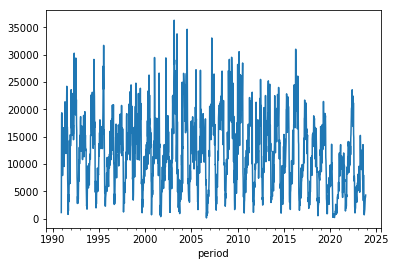

In [10]:
sorted_data['inc'].plot()

In [13]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W') for y in range(1991, sorted_data.index[-1].year)]

In [14]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

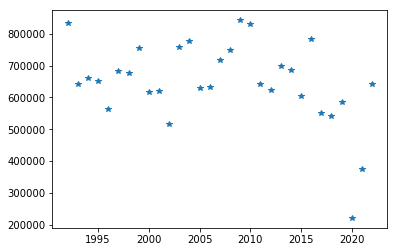

In [15]:
yearly_incidence.plot(style='*')

**Plus faible : 2020, plus forte : 2009**